# Trotterization

Bloq for building Trotterized unitary

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `TrotterizedUnitary`
Implement arbitrary trotterized unitary given any Trotter splitting of the Hamiltonian.

In [2]:
from qualtran.bloqs.for_testing.ising import IsingXUnitary, IsingZZUnitary
from qualtran.bloqs.chemistry.trotter.trotterized_unitary import TrotterizedUnitary

/usr/local/google/home/fmalone/.venvs/qualtran/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


### Example Instances

In [3]:
from qualtran.bloqs.for_testing.ising import IsingXUnitary, IsingZZUnitary

nsites = 3
j_zz = 2
gamma_x = 0.1
dt = 0.01
indices = (0, 1, 0)
coeffs = (0.5 * gamma_x, j_zz, 0.5 * gamma_x)
zz_bloq = IsingZZUnitary(nsites=nsites, angle=2 * dt * j_zz)
x_bloq = IsingXUnitary(nsites=nsites, angle=0.5 * 2 * dt * gamma_x)
trott_unitary = TrotterizedUnitary(
    bloqs=(x_bloq, zz_bloq), indices=indices, coeffs=coeffs, timestep=dt
)

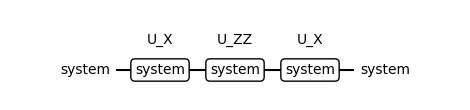

In [6]:
from qualtran.drawing import show_bloq
show_bloq(trott_unitary.decompose_bloq(), 'musical_score')

#### Graphical Signature

### Call Graph

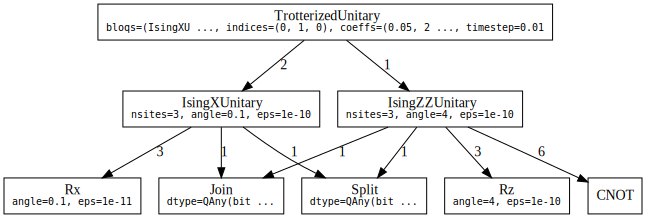

#### Counts totals:
 - `CNOT()`: 6
 - `Join(dtype=QAny(bitsize=3))`: 3
 - `Rx(0.03183098861837907π)`: 6
 - `Rz(1.2732395447351628π)`: 3
 - `Split(dtype=QAny(bitsize=3))`: 3

In [5]:
trott_unitary_g, trott_unitary_sigma = trott_unitary.call_graph()
show_call_graph(trott_unitary_g)
show_counts_sigma(trott_unitary_sigma)